<a href="https://colab.research.google.com/github/juhumkwon/Defense_Cloud/blob/main/5_3_agglomerative_hierarchical_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

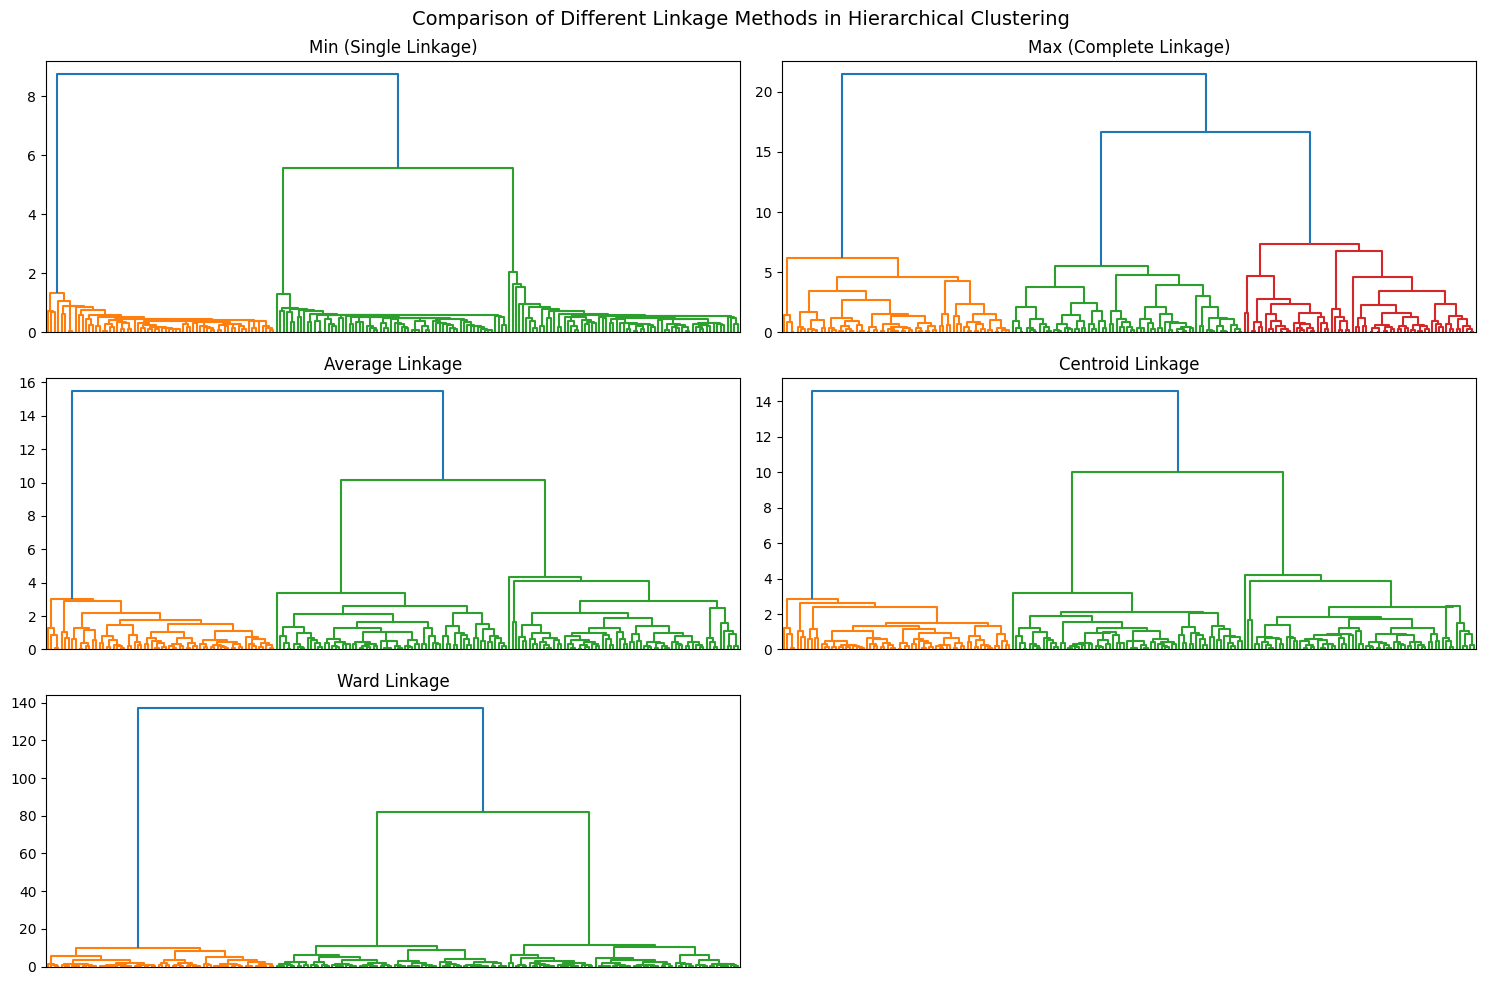

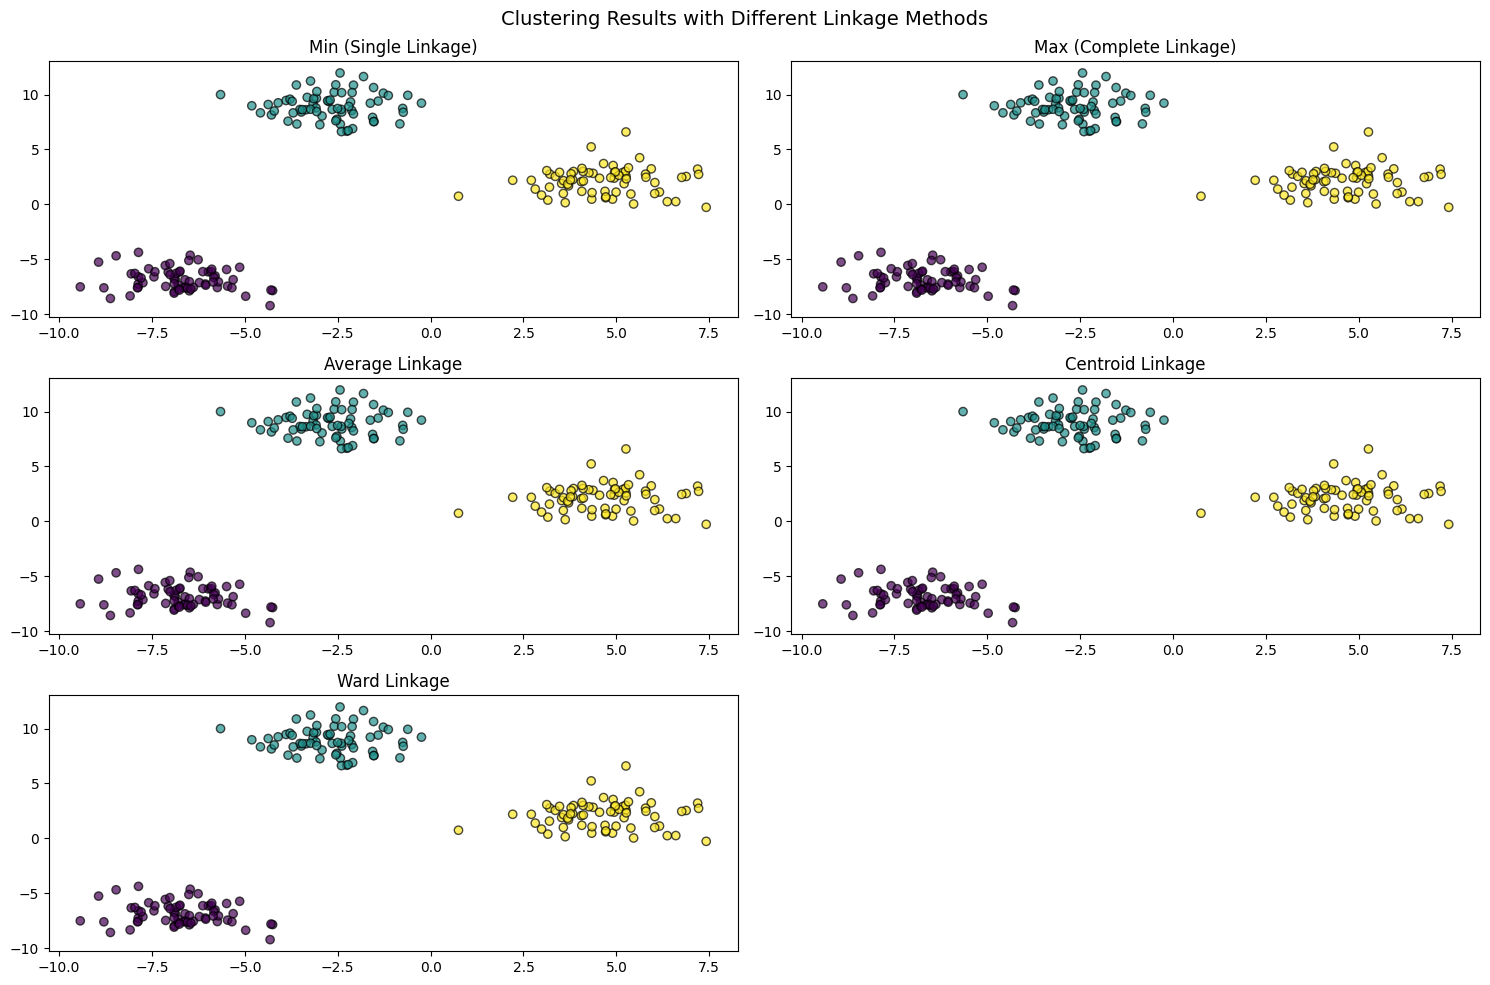

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# 1. 데이터 생성
X, _ = make_blobs(n_samples=200, centers=3, cluster_std=1.2, random_state=42)

# 2. 병합적 계층적 군집화 방법 리스트
methods = ['single', 'complete', 'average', 'centroid', 'ward']
titles = ['Min (Single Linkage)', 'Max (Complete Linkage)', 'Average Linkage', 'Centroid Linkage', 'Ward Linkage']

plt.figure(figsize=(15, 10))

# 3. 각 방법별 덴드로그램 시각화
# dendrogram(Z, no_labels=True) --> 계층적 군집화(Hierarchical Clustering)에서 생성된 덴드로그램을 그리는 코드입니다.
for i, method in enumerate(methods):
    plt.subplot(3, 2, i + 1)
    Z = linkage(X, method=method)
    dendrogram(Z, no_labels=True)
    plt.title(titles[i])

plt.suptitle("Comparison of Different Linkage Methods in Hierarchical Clustering", fontsize=14)
plt.tight_layout()
plt.show()

# 4. 클러스터 개수 설정 및 결과 시각화
num_clusters = 3
plt.figure(figsize=(15, 10))

"""
fcluster() 함수란?
fcluster()는 덴드로그램에서 특정 기준을 사용하여 클러스터를 형성하는 함수입니다.
Z: linkage() 함수로 생성된 계층적 군집화의 병합 정보(링케이지 행렬)
num_clusters: 원하는 클러스터 개수
criterion='maxclust': 최대 num_clusters 개의 클러스터를 생성하는 기준
"""
for i, method in enumerate(methods):
    Z = linkage(X, method=method)
    clusters = fcluster(Z, num_clusters, criterion='maxclust')

    plt.subplot(3, 2, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', edgecolors='k', alpha=0.7)
    plt.title(titles[i])

plt.suptitle("Clustering Results with Different Linkage Methods", fontsize=14)
plt.tight_layout()
plt.show()
